In [1]:
import scanpy as sc
import infercnvpy as cnv
import pandas as pd

In [16]:
adata = sc.read('/home/augusta/SSS_mount/insituCNV/data/simulated_CNV_data/technical_limiting_conditions/CNV_simulation_01_subsampled_counts_100.h5ad')
# adata = sc.read('/home/augusta/SSS_mount/insituCNV/data/simulated_CNV_data/technical_limiting_conditions/CNV_simulation_02_subsampled_counts_100.h5ad')
# adata = sc.read('/home/augusta/SSS_mount/insituCNV/data/simulated_CNV_data/technical_limiting_conditions/CNV_simulation_03_subsampled_counts_100.h5ad')

In [17]:
adata

AnnData object with n_obs × n_vars = 1268 × 25691
    obs: 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'model_id', 'sample_id', 'Phase', 'level_1', 'level_2', 'level_3', 'CountUMIs', 'CountGenes', 'X.Mitochondrial', 'NoveltyScore', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cnv_leiden', 'simulated_subclone'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_referenc

In [18]:
adata.X = adata.layers['CNV_GT']

In [19]:
adata.X.shape

(1268, 25691)

In [20]:
cnv.tl.infercnv(
    adata,
    reference_key="cell_type",  # Column in adata.obs containing reference cell types
    reference_cat=['ciliated cell', 'basal cell']  # List of reference cell types
)

  0%|          | 0/1 [00:00<?, ?it/s]

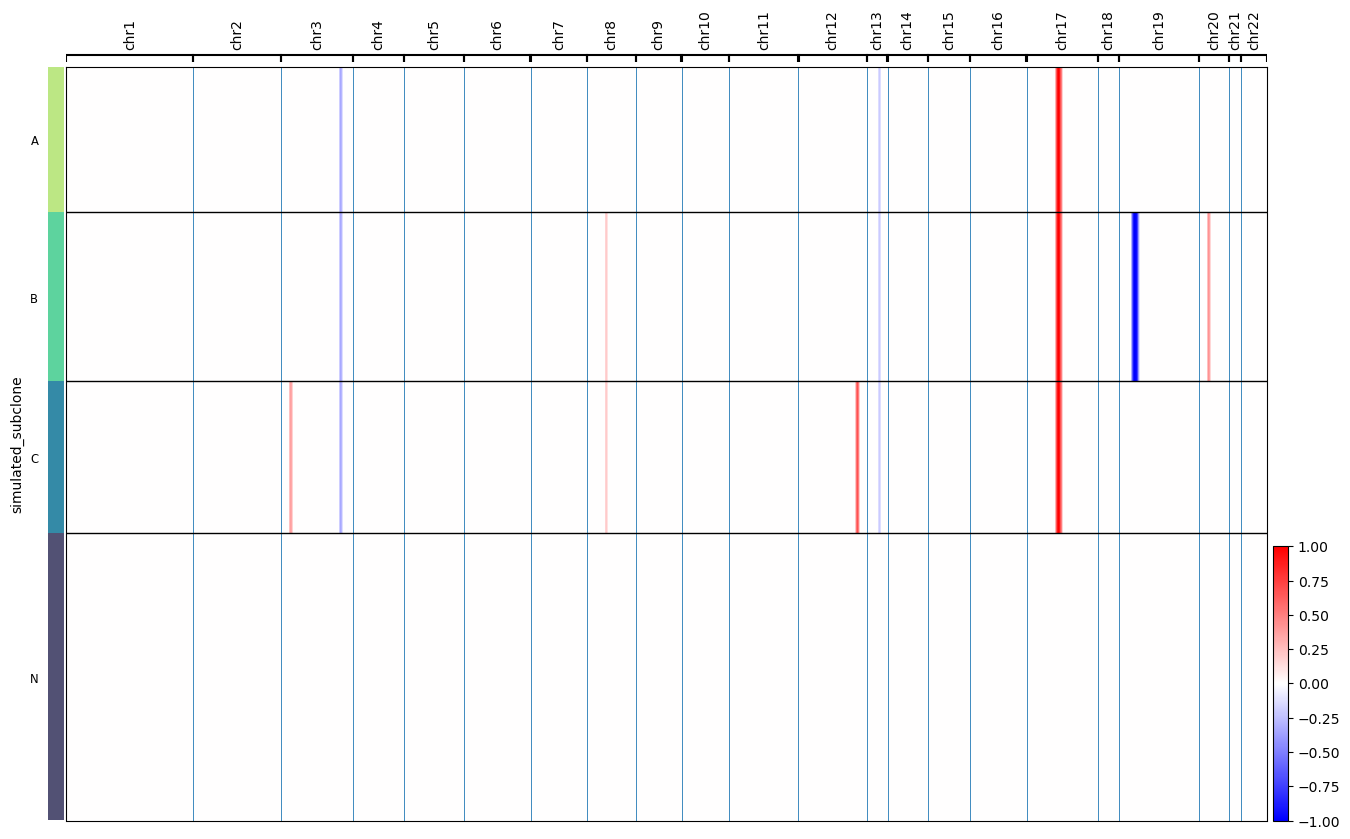

In [21]:
# Define custom colors
simulated_subclone_colors = ["#bce784","#5dd39e","#348aa7","#525174"]

# Assign custom colors to the respective categories
adata.uns["simulated_subclone_colors"] = simulated_subclone_colors

cnv.pl.chromosome_heatmap(adata, groupby='simulated_subclone', 
                          vmin=-1, vmax=1,
                          save='GT_CNV_simulation1_heatmap.pdf'
                          # save='GT_CNV_simulation2_heatmap.pdf'
                          # save='GT_CNV_simulation3_heatmap.pdf'
                         )